# Predict the miles per gallon for a car
In this lab you'll be building a model to predict the miles per gallon for a car.
The lab is based on a open dataset from [the UCI machine learning database](https://archive.ics.uci.edu/ml/index.php). 

At the end of this lab you will have a working model that you can deploy and use.
Follow the steps in this lab to train the model.

## Step 1: Load the data 
The first step in the process of building the model is to load the data from disk. The data is contained in a file called `auto-mpg.csv`. Use the pandas function [read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) to do this.

In [2]:
import pandas as pd

In [3]:
df_data = pd.read_csv('auto-mpg.csv')

## Step 2: Prep the data
In the previous step you've loaded the dataset as a pandas dataframe. 
Let see what the quality is of the data. Are there any columns with nulll values, what are the datatypes of the columns? Are there other things that need to be fixed? 

Remember, you can use the [info](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html) method on a dataframe to get information about null values. Also, you can use the [describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) method to get some statistics about the data.

In [4]:
df_data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [6]:
df_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### Let's take a look at the datatype 
Look at the data colum types, which colum stands out and why? Fix the column and convert it to a datatype float64.
Take a look at [the selection methods](https://pandas.pydata.org/pandas-docs/stable/indexing.html) that pandas provide to get access to specific columns. Use the [astype](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.astype.html) method on a series to convert its type.

In [7]:
df_data.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [8]:
df_data['horsepower'].value_counts()

150    22
90     20
88     19
110    18
100    17
75     14
95     14
105    12
70     12
67     12
65     10
85      9
97      9
145     7
140     7
80      7
92      6
72      6
68      6
?       6
84      6
78      6
175     5
86      5
180     5
60      5
130     5
170     5
115     5
71      5
       ..
54      1
149     1
113     1
152     1
91      1
77      1
116     1
167     1
89      1
107     1
94      1
132     1
102     1
230     1
220     1
133     1
108     1
135     1
61      1
82      1
208     1
142     1
66      1
193     1
103     1
49      1
93      1
200     1
148     1
122     1
Name: horsepower, Length: 94, dtype: int64

## Solution 
There is a '?' in the output. This gives two types of datatypes in one column, a string and integer. We can fix this several ways. In this case there are only 6 '?' from a total of 398 entries (use value_counts()). Therefore we can just remove the entries with the value '?'. And after that change the column type into a int64. 

In [9]:
df_data = df_data[df_data.horsepower != '?']

In [10]:
df_data.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [11]:
df_data['horsepower'] = df_data['horsepower'].astype('int64')

In [12]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null int64
weight          392 non-null int64
acceleration    392 non-null float64
model year      392 non-null int64
origin          392 non-null int64
car name        392 non-null object
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


## Step 3: Analyse the data 
Linear regression models work because they are based on the assumption that there's a correlation between the input variables you choose and the output that you want to predict. So before we actually build the model, we need to select features that are correlated to the MPG value of a car.

First step is to look at the correlation between the inputs and the outputs. A good way to see correlations between the input features and the output is to make a correlation heatmap.

Use the [corr](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.corr.html) method on your dataframe to calculate the pearson correlation coefficient. Then use the [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) function from the seaborn package to visualize the heatmap for the correlations.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df_data.corr(method='pearson')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


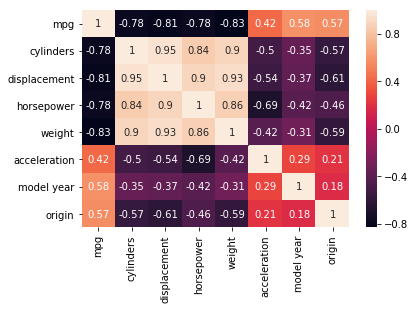

In [15]:
sns.heatmap(data=df_data.corr(), annot=True)

Which correlations looks strong and could be usefull features for our model? 

## Step 4: Let's build a model

For this regression problem we are going to build a Lineaire Regression Model. Like discussed during the workshop there are three posibilities. 

* Standard Lineair Regression
* Ridge 
* Lasso 

For more information about lineair regression, see [this, somewhat statistical, blog](https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/)

Let's first build the modelwith standard lineair regression! Do you remember the steps? 

* Define the features and target
* Scale the data 
* Split the data into train and test sets 
* Build the model 
* Validate the model with the root mean squared error
* Optimize the model 

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [17]:
features = ['cylinders','displacement','horsepower','acceleration','weight','origin','model year']
X = df_data[features].copy()
y = df_data['mpg'].copy()

In [18]:
X = StandardScaler().fit_transform(X)

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.33,random_state=324)
X_train.shape[0] == y_train.shape[0]

True

In [20]:
regressor = LinearRegression()

In [21]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
y_predicted = regressor.predict(X_test)

In [23]:
regressor.score(X_test, y_test)

0.8286430146299293

## Step 5 : Validate your model 
Now that you have a model it is important to test whether the model fits the data well enough. For this we're going to use the `score` method on the model that you've trained. This returns [the R-squared score](http://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit). This score expresses how well the observations fit the line you've trained.

In [24]:
rmse = sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted))
rmse

3.486729614901562

You'll probably notice that the score is pretty good for the model. Now this should make sense since you're using the whole dataset to validate your model. Remember from the slides that this is a bad idea. So go ahead, add another cell to the top of this notebook and [split the dataset](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Use the training to retrain your model and use the test set to validate the model.

## Step 6: Optimize the model
As explained before, linear regression models are sensitive to outliers. When you visualize the data for the model you will see that there are a few outliers. To lessen the effects of outliers on the model you can use a slightly different linear regression model, called ridge regression.

Try to train and validate a ridge regression model and see if that improves the situation.

In [25]:
from sklearn.linear_model import Ridge

In [26]:
model = Ridge()

model.fit(X_train, y_train).score(X_test,y_test)

0.8305695160558612

### Another alternative model
Ridge regression is one alternative to regular linear regression. But there's another, called [lasso regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) that uses a slightly different approach to fix outliers and other problems. Give the lasso regression as shot as well and see how that model scores.

In [27]:
from sklearn.linear_model import Lasso

In [28]:
model = Lasso()
model.fit(X_train, y_train).score(X_test, y_test)

0.8023390607301173

## Step 7: Perform extra validation using cross validation
The previous validation steps work, but you can get unlucky because the random split of the data fell short. A good trick to dampen the effects of the RNG is to use [cross validation](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). Give it a shot!

In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
cross_val_score(regressor, X, y, cv=5)

array([0.55691895, 0.68950582, 0.82212138, 0.6795006 , 0.2250594 ])

## Bonus: Plotting features

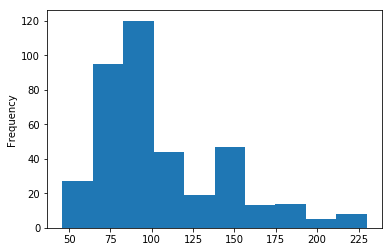

In [31]:
df_data['horsepower'].plot.hist()
plt.show()

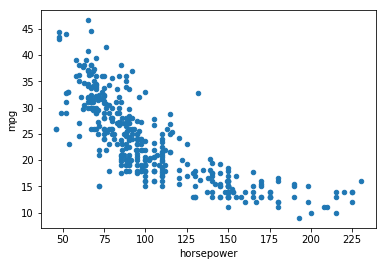

In [32]:
df_data.plot.scatter('horsepower', 'mpg')

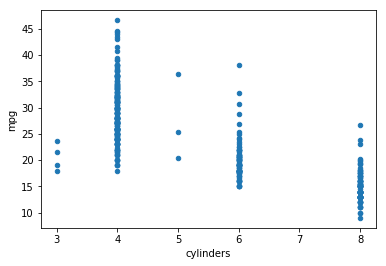

In [33]:
df_data.plot.scatter('cylinders','mpg')

In [50]:
df_data[df_data['cylinders'] == 6].describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,83.000000,83.0,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,19.973494,6.0,218.361446,101.506024,3202.120482,16.254217,75.951807,1.192771
std,3.828809,0.0,32.427246,14.310472,332.383425,2.031778,3.264381,0.551225
min,15.000000,6.0,145.000000,72.000000,2472.000000,11.300000,70.000000,1.000000
25%,18.000000,6.0,199.500000,92.500000,2945.000000,15.050000,74.000000,1.000000
50%,19.000000,6.0,231.000000,100.000000,3210.000000,16.000000,76.000000,1.000000
75%,21.000000,6.0,250.000000,110.000000,3431.000000,17.600000,78.000000,1.000000
max,38.000000,6.0,262.000000,165.000000,3907.000000,21.000000,82.000000,3.000000


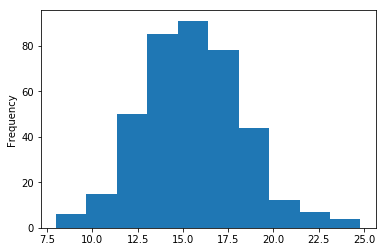

In [51]:
df_data['acceleration'].plot.hist()

In [46]:
cylinder_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl
